In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('postings.csv')

# Data Cleaning
data.dropna(subset=['job_title', 'job_skills'], inplace=True)
data['job_skills'] = data['job_skills'].str.lower()

# Feature Extraction
job_skills = data['job_skills'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
job_skills.name = 'Skill'

# Frequency Analysis
skill_counts = job_skills.value_counts().head(20)

# Visualization - Bar Chart for Top job_skills
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')
plt.title('Top 20 In-Demand job_skills for Software Engineers')
plt.xlabel('Frequency')
plt.ylabel('job_skills')
plt.show()

# Co-occurrence Analysis
skill_pairs = pd.DataFrame(data['job_skills'].str.get_dummies(sep=','))
skill_correlation = skill_pairs.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(skill_correlation, cmap='coolwarm', linewidths=0.5)
plt.title('Skill Co-occurrence Heatmap')
plt.show()

# Trend Analysis
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
monthly_skill_counts = job_skills.groupby([job_skills.index.year, job_skills.index.month]).value_counts().unstack().fillna(0)

# Plot trend for a specific skill (e.g., 'python')
plt.figure(figsize=(12, 6))
monthly_skill_counts['python'].plot()
plt.title('Trend of Python Skill Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


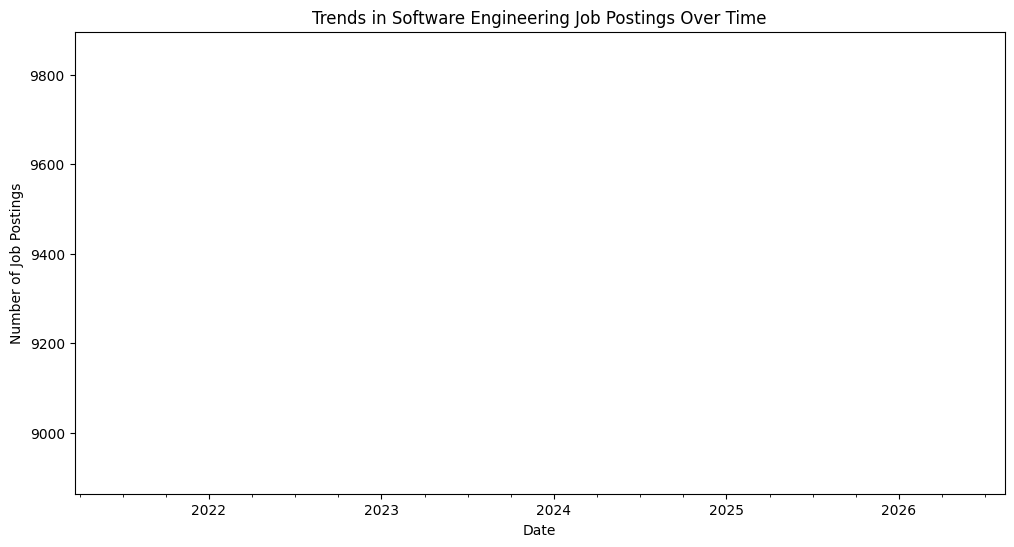

<ipython-input-3-84dfb6930461>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')


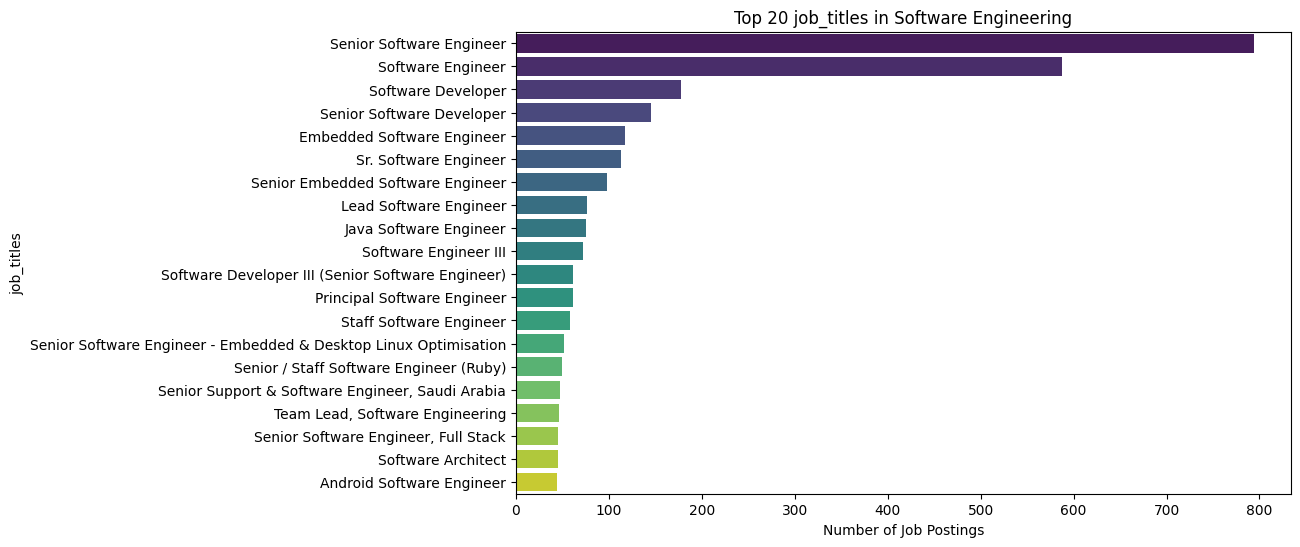

<ipython-input-3-84dfb6930461>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_locations.values, y=top_job_locations.index, palette='viridis')


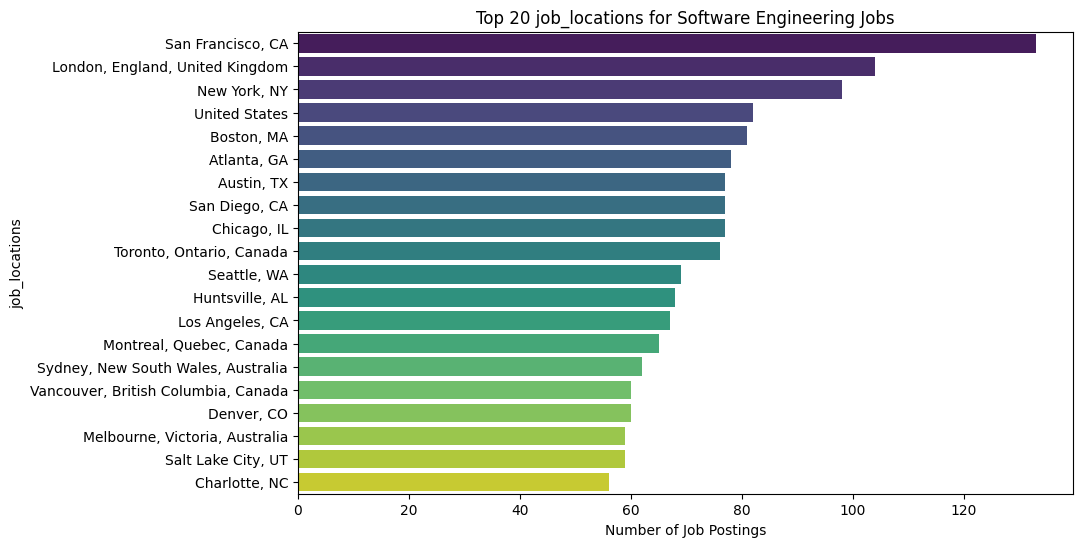

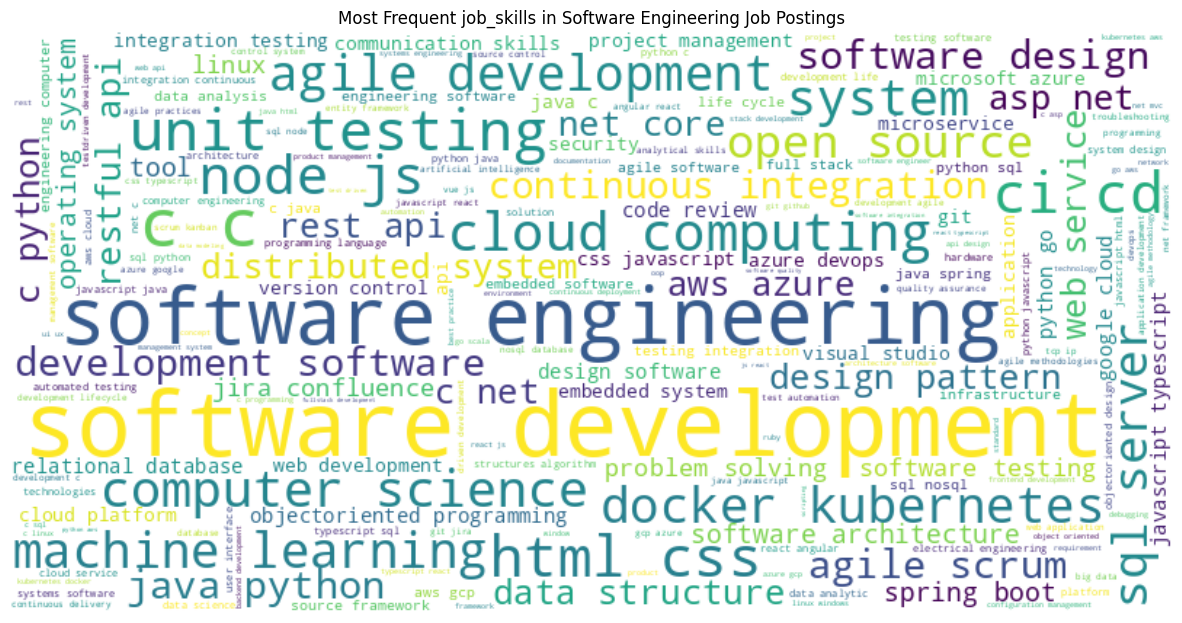

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('postings.csv')

# Data Cleaning
data.dropna(subset=['job_title', 'job_location', 'first_seen'], inplace=True)
data['first_seen'] = pd.to_datetime(data['first_seen'])
data['job_skills'] = data['job_skills'].str.lower()

# Feature Extraction
data['YearMonth'] = data['first_seen'].dt.to_period('M')

# Job Demand Over Time
monthly_job_postings = data.groupby('YearMonth').size()

# Visualization - Time Series Plot for Job Postings Over Time
plt.figure(figsize=(12, 6))
monthly_job_postings.plot()
plt.title('Trends in Software Engineering Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

# Popular job_titles
top_job_titles = data['job_title'].value_counts().head(20)

# Visualization - Bar Chart for Popular job_titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.title('Top 20 job_titles in Software Engineering')
plt.xlabel('Number of Job Postings')
plt.ylabel('job_titles')
plt.show()

# Geographic Distribution
top_job_locations = data['job_location'].value_counts().head(20)

# Visualization - Bar Chart for Top job_locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_locations.values, y=top_job_locations.index, palette='viridis')
plt.title('Top 20 job_locations for Software Engineering Jobs')
plt.xlabel('Number of Job Postings')
plt.ylabel('job_locations')
plt.show()

# Emerging Technologies (Word Cloud)
job_skills_text = ' '.join(data['job_skills'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_skills_text)

# Visualization - Word Cloud for job_skills
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent job_skills in Software Engineering Job Postings')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('postings.csv')

# Inspect the dataset
print(data.head())
print(data.columns)


                                           job_title            company  \
0                               C# Software Engineer       E Tech Group   
1                   Software Implementation Engineer             Kardex   
2  Senior Software Engineer, Back End (Go, AWS, J...  Jobs for Humanity   
3   Senior Manager, Software Engineering, Full Stack  Jobs for Humanity   
4  Lead Software Engineer, Full Stack(JavaScript/...  Jobs for Humanity   

       job_location                                           job_link  \
0  West Chester, OH  https://www.linkedin.com/jobs/view/c%23-softwa...   
1    Cincinnati, OH  https://www.linkedin.com/jobs/view/software-im...   
2   Chattanooga, TN  https://www.linkedin.com/jobs/view/senior-soft...   
3   Chattanooga, TN  https://www.linkedin.com/jobs/view/senior-mana...   
4   Chattanooga, TN  https://www.linkedin.com/jobs/view/lead-softwa...   

   first_seen  search_city search_country   job level job_type  \
0  2023-12-25    Covington  United Sta

In [ ]:
# Drop rows with missing critical values
data.dropna(subset=['job_title', 'first_seen', 'job_location', 'job_skills'], inplace=True)

# Convert Posting Date to datetime format
data['first_seen'] = pd.to_datetime(data['first_seen'])

# Extract year and month from Posting Date
data['YearMonth'] = data['first_seen'].dt.to_period('M')


In [ ]:
# Aggregate job postings by YearMonth
job_counts = data.groupby('YearMonth').size().reset_index(name='Job Count')

# Convert YearMonth to string format for one-hot encoding
job_counts['YearMonth'] = job_counts['YearMonth'].astype(str)

# One-hot encode the YearMonth feature
features = pd.get_dummies(job_counts['YearMonth'])

# Labels are the Job Count
labels = job_counts['Job Count']

# Inspect the features and labels
print(features.head())
print(labels.head())


   2023-12
0     True
0    9367
Name: Job Count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine job description and skills into a single text feature
data['Text'] = data['job_summary'] + ' ' + data['job_skills']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
features = vectorizer.fit_transform(data['Text']).toarray()

# Labels are the Job Titles
labels = data['job_title']

# Inspect the features and labels
print(features.shape)
print(labels.head())


(9367, 500)
0                                 C# Software Engineer
1                     Software Implementation Engineer
2    Senior Software Engineer, Back End (Go, AWS, J...
3     Senior Manager, Software Engineering, Full Stack
4    Lead Software Engineer, Full Stack(JavaScript/...
Name: job_title, dtype: object


In [ ]:
# Assuming the necessary libraries are already imported
import pandas as pd

# Load your dataset
data = pd.read_csv('postings.csv')

# Clean and preprocess the data
data.dropna(subset=['job_title', 'first_seen'], inplace=True)
data['first_seen'] = pd.to_datetime(data['first_seen'])
data['YearMonth'] = data['first_seen'].dt.to_period('M')

# Aggregate the data by month
job_counts = data.groupby(['job_title', 'YearMonth']).size().reset_index(name='Job Count')
job_counts['YearMonth'] = job_counts['YearMonth'].astype(str)

# Prepare features and labels
features = pd.get_dummies(job_counts['YearMonth'])
labels = job_counts['Job Count']
print(data.shape)
print(job_counts.shape)

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


(9380, 12)
(3870, 3)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 35.38977928177101


In [ ]:
# Future dates for prediction
future_dates = ['2025-05', '2026-06', '2027-07']

# Convert future dates to the same format and one-hot encode
future_features = pd.get_dummies(pd.Series(future_dates))

# Ensure future_features has the same columns as the training features
future_features = future_features.reindex(columns=features.columns, fill_value=0)

# Make predictions
future_predictions = model.predict(future_features)
print("Future Job Demand Predictions:", future_predictions)


NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your data
file_path = 'postings.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['job_summary'].fillna('Unknown', inplace=True)
data['job_title'].fillna('Unknown', inplace=True)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
data['job_summary'] = data['job_summary'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['job_summary'], data['job_title'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Count the number of samples per class
class_counts = y_train.value_counts()

# Define a threshold for rare classes
threshold = 5  # Adjust based on your dataset

# Identify rare classes
rare_classes = class_counts[class_counts < threshold].index.tolist()

# Separate the rare classes
X_train_common = X_train[~y_train.isin(rare_classes)]
y_train_common = y_train[~y_train.isin(rare_classes)]

X_train_rare = X_train[y_train.isin(rare_classes)]
y_train_rare = y_train[y_train.isin(rare_classes)]

# Vectorize the common class data
X_train_common_tfidf = tfidf.transform(X_train_common)

# Handle imbalanced data using SMOTE for common classes
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_common_tfidf_res, y_train_common_res = smote.fit_resample(X_train_common_tfidf, y_train_common)

# Combine the common and rare classes
X_train_tfidf_res = np.vstack((X_train_common_tfidf_res.toarray(), tfidf.transform(X_train_rare).toarray()))
y_train_res = np.hstack((y_train_common_res, y_train_rare))

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model and vectorizer
joblib.dump(model, 'job_title_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Function to predict job title based on job description
def predict_job_title(description):
    # Preprocess the description
    description_processed = preprocess_text(description)
    
    # Transform the description using the loaded TF-IDF vectorizer
    description_tfidf = tfidf.transform([description_processed])
    
    # Predict the job title using the loaded model
    predicted_title = model.predict(description_tfidf)
    
    return predicted_title[0]

# Example usage
new_description = "We are looking for a software engineer with experience in Python and machine learning."
predicted_title = predict_job_title(new_description)
print(f"Predicted Job Title: {predicted_title}")

/tmp/ipykernel_72533/2300517562.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job_summary'].fillna('Unknown', inplace=True)
/tmp/ipykernel_72533/2300517562.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [1]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your data
file_path = 'postings.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['job_summary'].fillna('Unknown', inplace=True)
data['job_title'].fillna('Unknown', inplace=True)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
data['job_summary'] = data['job_summary'].apply(preprocess_text)

# Optionally sample a subset of the data for training
data_sample = data.sample(frac=0.5, random_state=42)  # Use 50% of the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_sample['job_summary'], data_sample['job_title'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer with reduced vocabulary size
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Handle imbalanced data using SMOTE with fewer neighbors
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model and vectorizer
joblib.dump(model, 'job_title_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Function to predict job title based on job description
def predict_job_title(description):
    # Preprocess the description
    description_processed = preprocess_text(description)
    
    # Transform the description using the loaded TF-IDF vectorizer
    description_tfidf = tfidf.transform([description_processed])
    
    # Predict the job title using the loaded model
    predicted_title = model.predict(description_tfidf)
    
    return predicted_title[0]

# Example usage
new_description = "We are looking for a software engineer with experience in Python and machine learning."
predicted_title = predict_job_title(new_description)
print(f"Predicted Job Title: {predicted_title}")


/tmp/ipykernel_74196/690696577.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job_summary'].fillna('Unknown', inplace=True)
/tmp/ipykernel_74196/690696577.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1

In [2]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your data
file_path = 'postings.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['job_summary'].fillna('Unknown', inplace=True)
data['job_title'].fillna('Unknown', inplace=True)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
data['job_summary'] = data['job_summary'].apply(preprocess_text)

# Optionally sample a subset of the data for training
data_sample = data.sample(frac=0.5, random_state=42)  # Use 50% of the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_sample['job_summary'], data_sample['job_title'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer with reduced vocabulary size
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Count the number of samples per class
class_counts = y_train.value_counts()

# Define a threshold for rare classes
threshold = 5  # Adjust based on your dataset

# Identify rare classes
rare_classes = class_counts[class_counts < threshold].index.tolist()

# Separate the rare classes
X_train_common = X_train[~y_train.isin(rare_classes)]
y_train_common = y_train[~y_train.isin(rare_classes)]

X_train_rare = X_train[y_train.isin(rare_classes)]
y_train_rare = y_train[y_train.isin(rare_classes)]

# Vectorize the common class data
X_train_common_tfidf = tfidf.transform(X_train_common)

# Handle imbalanced data using SMOTE for common classes
if len(y_train_common) > 0:
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_train_common_tfidf_res, y_train_common_res = smote.fit_resample(X_train_common_tfidf, y_train_common)
else:
    X_train_common_tfidf_res = X_train_common_tfidf
    y_train_common_res = y_train_common

# Combine the common and rare classes
X_train_tfidf_res = np.vstack((X_train_common_tfidf_res.toarray(), tfidf.transform(X_train_rare).toarray()))
y_train_res = np.hstack((y_train_common_res, y_train_rare))

# Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model and vectorizer
joblib.dump(model, 'job_title_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Function to predict job title based on job description
def predict_job_title(description):
    # Preprocess the description
    description_processed = preprocess_text(description)
    
    # Transform the description using the loaded TF-IDF vectorizer
    description_tfidf = tfidf.transform([description_processed])
    
    # Predict the job title using the loaded model
    predicted_title = model.predict(description_tfidf)
    
    return predicted_title[0]

# Example usage
new_description = "We are looking for a software engineer with experience in Python and machine learning."
predicted_title = predict_job_title(new_description)
print(f"Predicted Job Title: {predicted_title}")


/tmp/ipykernel_74196/4243402706.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job_summary'].fillna('Unknown', inplace=True)
/tmp/ipykernel_74196/4243402706.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Accuracy: 0.24307036247334754
                                                                                                          precision    recall  f1-score   support

                                                              (Remote) Mobile App Software Test Engineer       0.00      0.00      0.00         1
                                                                                  .NET Software Engineer       0.00      0.00      0.00         1
                                                 .NET Software Engineer - Global Sports Company – Boston       0.00      0.00      0.00         1
                                                                        .NET Software Engineer - Houston       0.00      0.00      0.00         2
                                                                    .NET Software Engineer - Jersey City       0.00      0.00      0.00         1
                           .NET Software Engineer – National Creative Marketing Collective - 

In [2]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load your data
file_path = 'postings.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['job_summary'].fillna('Unknown', inplace=True)
data['job_title'].fillna('Unknown', inplace=True)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
data['job_summary'] = data['job_summary'].apply(preprocess_text)

# Optionally sample a subset of the data for training
data_sample = data.sample(frac=0.5, random_state=42)  # Use 50% of the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_sample['job_summary'], data_sample['job_title'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer with reduced vocabulary size
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Count the number of samples per class
class_counts = y_train.value_counts()

# Define a threshold for rare classes
threshold = 5  # Adjust based on your dataset

# Identify rare classes
rare_classes = class_counts[class_counts < threshold].index.tolist()

# Separate the rare classes
X_train_common = X_train[~y_train.isin(rare_classes)]
y_train_common = y_train[~y_train.isin(rare_classes)]

X_train_rare = X_train[y_train.isin(rare_classes)]
y_train_rare = y_train[y_train.isin(rare_classes)]

# Vectorize the common class data
X_train_common_tfidf = tfidf.transform(X_train_common)

# Handle imbalanced data using SMOTE for common classes
if len(y_train_common) > 0:
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_train_common_tfidf_res, y_train_common_res = smote.fit_resample(X_train_common_tfidf, y_train_common)
else:
    X_train_common_tfidf_res = X_train_common_tfidf
    y_train_common_res = y_train_common

# Combine the common and rare classes
X_train_tfidf_res = np.vstack((X_train_common_tfidf_res.toarray(), tfidf.transform(X_train_rare).toarray()))
y_train_res = np.hstack((y_train_common_res, y_train_rare))

# Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model and vectorizer
joblib.dump(model, 'job_title_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Function to predict job title based on job description
def predict_job_title(description):
    # Preprocess the description
    description_processed = preprocess_text(description)
    
    # Transform the description using the loaded TF-IDF vectorizer
    description_tfidf = tfidf.transform([description_processed])
    
    # Predict the job title using the loaded model
    predicted_title = model.predict(description_tfidf)
    
    return predicted_title[0]

# Example usage
new_description = "We are looking for a software engineer with experience in Python and machine learning."
predicted_title = predict_job_title(new_description)
print(f"Predicted Job Title: {predicted_title}")


/tmp/ipykernel_74196/4243402706.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job_summary'].fillna('Unknown', inplace=True)
/tmp/ipykernel_74196/4243402706.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Accuracy: 0.24307036247334754
                                                                                                          precision    recall  f1-score   support

                                                              (Remote) Mobile App Software Test Engineer       0.00      0.00      0.00         1
                                                                                  .NET Software Engineer       0.00      0.00      0.00         1
                                                 .NET Software Engineer - Global Sports Company – Boston       0.00      0.00      0.00         1
                                                                        .NET Software Engineer - Houston       0.00      0.00      0.00         2
                                                                    .NET Software Engineer - Jersey City       0.00      0.00      0.00         1
                           .NET Software Engineer – National Creative Marketing Collective - 

In [35]:
import joblib
import re

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Function to load the model and vectorizer
def load_model_and_vectorizer(model_path='job_title_model.pkl', vectorizer_path='tfidf_vectorizer.pkl'):
    # Load the model and vectorizer
    model = joblib.load(model_path)
    tfidf = joblib.load(vectorizer_path)
    return model, tfidf

# Function to predict job title based on job description
def predict_job_title(description, model, tfidf):
    # Preprocess the description
    description_processed = preprocess_text(description)
    
    # Transform the description using the loaded TF-IDF vectorizer
    description_tfidf = tfidf.transform([description_processed])
    
    # Predict the job title using the loaded model
    predicted_title = model.predict(description_tfidf)
    
    return predicted_title[0]

# Example usage
if __name__ == "__main__":
    # Load the model and vectorizer
    model, tfidf = load_model_and_vectorizer()
    
    # New job description to predict
    new_description = "java"
    
    # Predict the job title
    predicted_title = predict_job_title(new_description, model, tfidf)
    print(f"Predicted Job Title: {predicted_title}")


Predicted Job Title: Software Engineer, Backend


In [26]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.combine import SMOTEENN

# Load your data
file_path = 'postings2.csv'
data = pd.read_csv(file_path)

# Fill missing values without using inplace
data['job_summary'] = data['job_summary'].fillna('Unknown')
data['job_title'] = data['job_title'].fillna('Unknown')

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
data['job_summary'] = data['job_summary'].apply(preprocess_text)

# Optionally sample a subset of the data for training
data_sample = data.sample(frac=0.5, random_state=42)  # Use 50% of the data

class_counts = data_sample['job_title'].value_counts()
valid_classes = class_counts[class_counts > 1].index
data_filtered = data_sample[data_sample['job_title'].isin(valid_classes)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_filtered['job_summary'], data_filtered['job_title'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer with n-grams and adjusted parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Use n-grams (1,2) and more features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check the number of samples in the minority class
minority_class_count = y_train.value_counts().min()
k_neighbors = max(1, min(5, minority_class_count - 1))  # Ensure k_neighbors is at least 1 and <= number of samples in the smallest class

# Handle imbalanced data using SMOTEENN (SMOTE + ENN)
if minority_class_count > 1:
    smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=k_neighbors), random_state=42)
    X_train_tfidf_res, y_train_res = smote_enn.fit_resample(X_train_tfidf, y_train)
else:
    X_train_tfidf_res, y_train_res = X_train_tfidf, y_train  # Skip SMOTEENN if too few samples
# StratifiedKFold for cross-validation


# Random Forest model with hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_tfidf_res, y_train_res)
model = grid_search.best_estimator_

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model and vectorizer
joblib.dump(model, 'job_title_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Function to predict job title based on job description
def predict_job_title(description,model,tfidf):
    # Preprocess the description
    description_processed = preprocess_text(description)
    
    # Transform the description using the loaded TF-IDF vectorizer
    description_tfidf = tfidf.transform([description_processed])
    
    # Predict the job title using the loaded model
    predicted_title = model.predict(description_tfidf)
    
    return predicted_title[0]

# Example usage
if __name__ == "__main__":
    # Load the model and vectorizer
    model, tfidf = joblib.load('job_title_model.pkl'), joblib.load('tfidf_vectorizer.pkl')
    
    # New job description to predict
    new_description = "We are looking for a software engineer with experience in Python and machine learning."
    
    # Predict the job title
    predicted_title = predict_job_title(new_description, model, tfidf)
    print(f"Predicted Job Title: {predicted_title}")


/home/ararsa/Desktop/Software-Job-Market-Analysis/env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy: 0.6202090592334495
                                                                                         precision    recall  f1-score   support

                                                            (USA) Software Engineer III       0.00      0.00      0.00         0
                                                        .NET Software Engineer - Dallas       0.00      0.00      0.00         0
                                                       .NET Software Engineer - Houston       0.00      0.00      0.00         1
                                                   .NET Software Engineer - Jersey City       0.00      0.00      0.00         1
                                                             Advanced Software Engineer       0.00      0.00      0.00         1
                                                              Android Software Engineer       1.00      1.00      1.00         4
                                      Application and User Interfac